Project Name: **Real Time Traffic Flow Prediction**

Prepared On: **03 Feb 2025**

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df2 = pd.read_csv('/content/Traffic.csv')
print(df2.shape)
df2.sample(5)

(2976, 9)


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
2292,9:00:00 PM,2,Thursday,95,15,18,9,137,normal
558,7:30:00 PM,15,Sunday,102,25,12,24,163,high
1267,4:45:00 AM,23,Monday,63,25,2,8,98,low
786,4:30:00 AM,18,Wednesday,74,28,1,13,116,normal
300,3:00:00 AM,13,Friday,19,2,0,11,32,low


In [ ]:
df1 = pd.read_csv('/content/TrafficTwoMonth.csv')
print(df1.shape)
df1.sample(5)

(5952, 9)


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
5830,5:30:00 PM,8,Wednesday,106,22,43,5,176,heavy
4634,6:30:00 AM,27,Friday,57,18,7,13,95,low
2280,6:00:00 PM,2,Thursday,112,12,30,10,164,high
4351,7:45:00 AM,24,Tuesday,101,14,24,0,139,normal
3880,10:00:00 AM,19,Thursday,10,1,13,7,31,low


In [ ]:
# To join this two dataframe, first we ensure the columns and dtype of both dataframe are same, let verify
print(df2.columns == df1.columns)
print(df2.dtypes == df1.dtypes)

[ True  True  True  True  True  True  True  True  True]
Time                 True
Date                 True
Day of the week      True
CarCount             True
BikeCount            True
BusCount             True
TruckCount           True
Total                True
Traffic Situation    True
dtype: bool


In [ ]:
# combined the two dataframe df2 and df1
df = pd.concat([df2,df1], axis=0, ignore_index=True).reset_index(drop=True)
print(df.shape)
df.sample(10)

(8928, 9)


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
6877,3:15:00 PM,19,Thursday,115,24,16,5,160,normal
3599,11:45:00 AM,16,Monday,24,7,13,34,78,normal
1319,5:45:00 PM,23,Monday,111,33,28,5,177,heavy
5381,1:15:00 AM,4,Saturday,8,0,1,35,44,normal
6722,12:30:00 AM,18,Wednesday,20,5,0,10,35,low
2836,1:00:00 PM,8,Wednesday,27,6,14,30,77,normal
2077,3:15:00 PM,31,Tuesday,90,25,18,20,153,normal
525,11:15:00 AM,15,Sunday,33,9,11,21,74,normal
2502,1:30:00 AM,5,Sunday,11,4,1,26,42,normal
2251,10:45:00 AM,2,Thursday,17,13,13,27,70,normal


In [ ]:
# check for null values
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [ ]:
# check for duplication
df.duplicated().sum()

2604

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

### Feature Engineering

In [ ]:
# We will work with copy of original
df = df.copy()

# renaming
df = df.rename(columns={'Date': 'Day_of_Month'})

In [ ]:
df.sample(2)

,Time,Day_of_Month,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
1844,5:00:00 AM,29,Sunday,82,2,4,14,102,normal
4706,12:30:00 AM,28,Saturday,13,2,1,38,54,normal


In [ ]:
# Split Time into Hour, Minute, and AM/PM without adding a date
df['Hour'] = df['Time'].str.extract(r'(\d+):')[0].astype(int)  # Extract hour
df['Minute'] = df['Time'].str.extract(r':(\d+)')[0].astype(int)  # Extract minute
df['AM_PM'] = df['Time'].str.extract(r'([APM]+)')[0]  # Extract AM/PM

df.sample(2)

,Time,Day_of_Month,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,Minute,AM_PM
2595,12:45:00 AM,6,Monday,11,3,1,28,43,normal,12,45,AM
5250,4:30:00 PM,2,Thursday,146,28,12,11,197,heavy,4,30,PM


In [ ]:
df = df.drop(columns=['Time'])
df.sample(2)

,Day_of_Month,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,Minute,AM_PM
1532,25,Wednesday,17,4,0,11,32,low,11,0,PM
3059,10,Tuesday,78,6,16,35,135,high,8,45,PM


### Transformation

In [ ]:
day_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
}

df['Day_of_Week_Encoded'] = df['Day of the week'].map(day_mapping)

In [ ]:
def convert_to_24_hour(hour, am_pm):
    if am_pm == 'AM' and hour == 12:
        return 0  # 12 AM → 00
    elif am_pm == 'PM' and hour != 12:
        return hour + 12  # Convert PM hours (except 12 PM)
    else:
        return hour  # Keep other cases unchanged

df['Hour_24'] = df.apply(lambda row: convert_to_24_hour(row['Hour'], row['AM_PM']), axis=1)

In [ ]:
df = df.drop(columns=['AM_PM','Day of the week','Hour'])

In [ ]:
df.sample(5)

,Day_of_Month,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Minute,Day_of_Week_Encoded,Hour_24
2964,9,107,13,14,28,162,high,0,4,21
4483,25,134,10,13,19,176,heavy,45,3,16
5208,2,139,13,21,8,181,heavy,0,4,6
5880,9,96,22,10,8,136,normal,0,4,6
647,16,120,35,44,8,207,heavy,45,1,17


### EDA

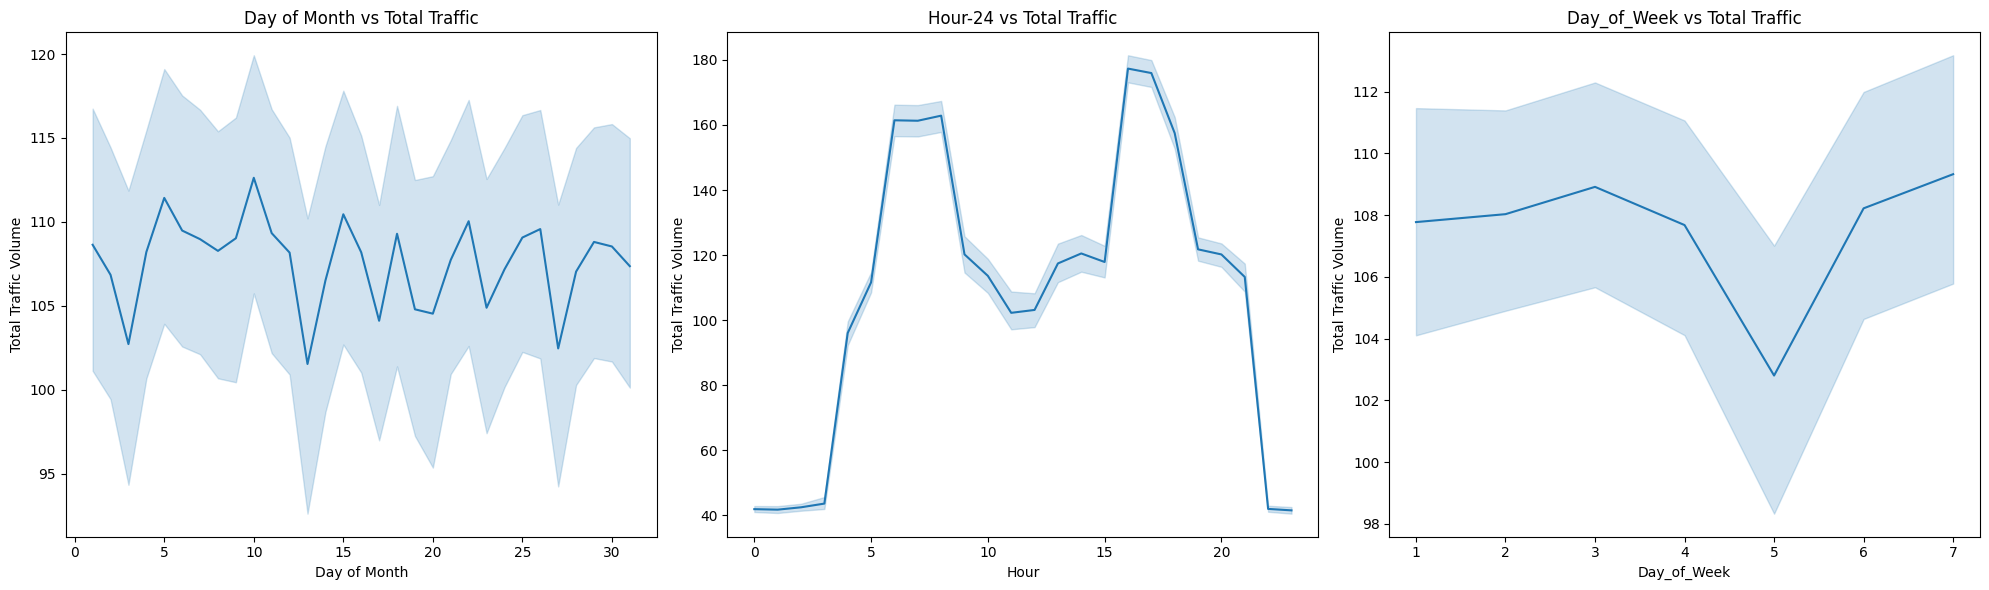

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplot grid: 1 row, 4 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot for 'Day_of_Month' vs 'Total'
sns.lineplot(x='Day_of_Month', y='Total', data=df, ax=axes[0])
axes[0].set_title('Day of Month vs Total Traffic')
axes[0].set_xlabel('Day of Month')
axes[0].set_ylabel('Total Traffic Volume')

# Plot for 'CarCount' vs 'Total'
sns.lineplot(x='Hour_24', y='Total', data=df, ax=axes[1])
axes[1].set_title('Hour-24 vs Total Traffic')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Total Traffic Volume')

# Plot for 'BikeCount' vs 'Total'
sns.lineplot(x='Day_of_Week_Encoded', y='Total', data=df, ax=axes[2])
axes[2].set_title('Day_of_Week vs Total Traffic')
axes[2].set_xlabel('Day_of_Week')
axes[2].set_ylabel('Total Traffic Volume')

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

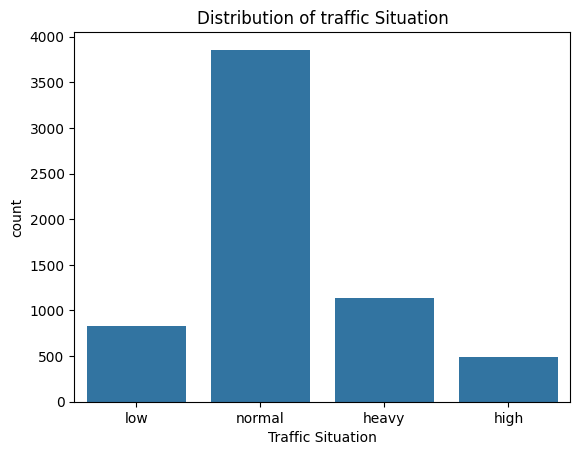

In [ ]:
# check the distribution of target variable
sns.countplot(x='Traffic Situation',data=df)
plt.title('Distribution of traffic Situation')
plt.show()

### Normalization & Split

In [ ]:
X = df.drop(columns=['Traffic Situation']).values
y = df['Traffic Situation'].values

X

array([[ 10,  31,   0, ...,   0,   2,   0],
       [ 10,  49,   0, ...,  15,   2,   0],
       [ 10,  46,   0, ...,  30,   2,   0],
       ...,
       [  9, 107,  13, ...,   0,   4,  21],
       [  9, 106,  18, ...,  30,   4,  21],
       [  9,  14,   3, ...,  45,   4,  23]])

In [ ]:
X.shape

(6324, 9)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Traffic Situation'])

# Check the encoded classes
print("Encoded Classes:", label_encoder.classes_)

Encoded Classes: ['heavy' 'high' 'low' 'normal']


In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the target variable
y_one_hot = to_categorical(y_encoded)

# Check the shape of the one-hot encoded target
print("Shape of y_one_hot:", y_one_hot.shape)

Shape of y_one_hot: (6324, 4)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_one_hot,test_size=0.2,random_state=1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5059, 9), (1265, 9), (5059, 4), (1265, 4))

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform it
X_train_scale = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (without fitting)
X_test_scale = scaler.transform(X_test)

# Save the fitted scaler to a file
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
X_train_scale[0]

array([ 0.10916724,  0.44859883,  0.26373434,  0.27886565, -0.98876733,
        0.28098514, -0.45427089, -0.98247573,  1.3596706 ])

### Model Building

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Input

In [ ]:
model = Sequential()

model.add(Input(shape=(9,)))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu'))

model.add(Dense(y_one_hot.shape[1], activation='softmax'))


model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,700 (14.45 KB)

 Trainable params: 3,508 (13.70 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
)

Epoch 1/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4878 - loss: 1.2558 - val_accuracy: 0.5939 - val_loss: 0.9969
Epoch 2/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7591 - loss: 0.6285 - val_accuracy: 0.7866 - val_loss: 0.4927
Epoch 3/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7954 - loss: 0.5131 - val_accuracy: 0.8310 - val_loss: 0.4028
Epoch 4/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8020 - loss: 0.4686 - val_accuracy: 0.8488 - val_loss: 0.3529
Epoch 5/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8176 - loss: 0.4462 - val_accuracy: 0.8429 - val_loss: 0.3632
Epoch 6/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8027 - loss: 0.4703 - val_accuracy: 0.8488 - val_loss: 0.3436
Epoch 7/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8323 - loss: 0.4130 - val_accuracy: 0.8646 - val_loss: 0.3253
Epoch 8/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8384 - loss: 0.3950 - val_accu

### Evaluate the Model

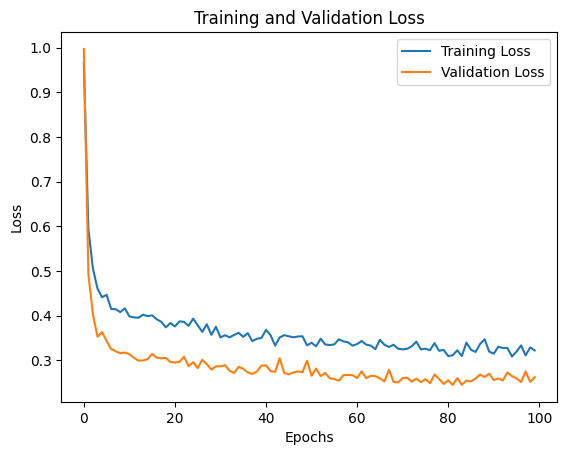

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

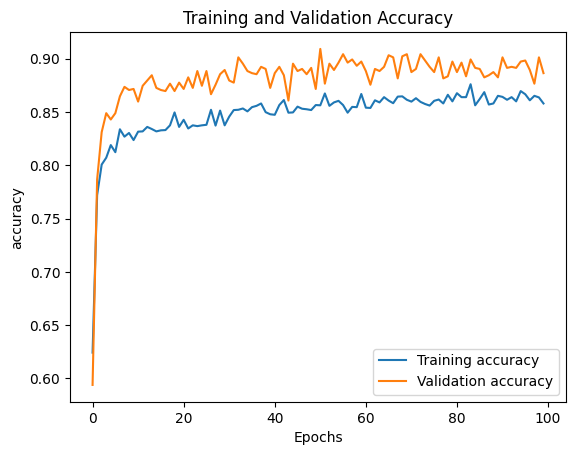

In [ ]:
# Plot training and validation loss
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.24702119827270508
Test Accuracy: 0.896442711353302


Confusion Matrix:
[[225   2   0   0]
 [ 19  55   0  27]
 [  1   0 132  22]
 [ 24  11  57 690]]


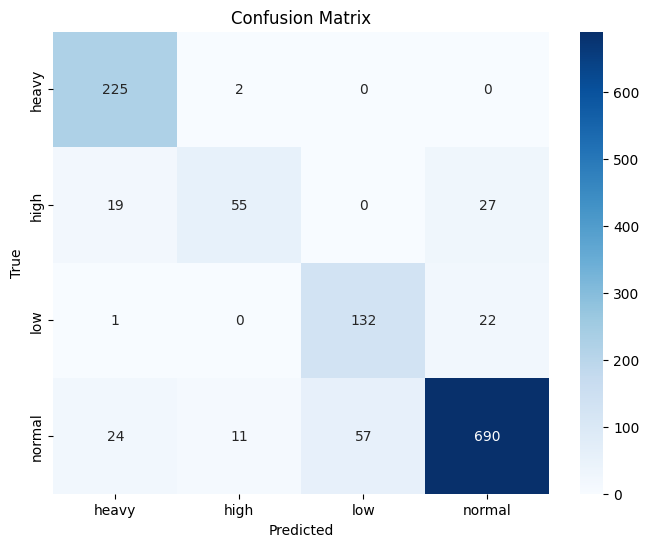

In [ ]:
import numpy as np

# Convert one-hot encoded y_test and y_pred to class labels
y_true_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)


from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Save The Model

In [ ]:
# Save the trained model
model.save('traffic_prediction_model.keras')

### Make Prediction on New Data

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('traffic_prediction_model.keras')

# Load the saved scaler
scaler = joblib.load('scaler.pkl')

# Load the label encoder (assume it's saved earlier)
# label_encoder = joblib.load('label_encoder.pkl')  # Uncomment if you saved label encoder

# Function to get user input
def get_user_input():
    print("Enter the following traffic data:")
    car_count = int(input("Car Count: "))
    bike_count = int(input("Bike Count: "))
    bus_count = int(input("Bus Count: "))
    truck_count = int(input("Truck Count: "))
    total_count = int(input("Total Count: "))
    day_of_month = int(input("Day of Month: "))
    day_of_week_encoded = int(input("Day of Week (Encoded): "))
    minute = int(input("Minute: "))
    hour_24 = int(input("Hour (24-hour format): "))

    return np.array([[car_count, bike_count, bus_count, truck_count, total_count,
                       day_of_month, day_of_week_encoded, minute, hour_24]])

# Get user input
new_data = get_user_input()

# Normalize the new data using the loaded scaler
new_data_scaled = scaler.transform(new_data)

# Make prediction using the loaded model
prediction = loaded_model.predict(new_data_scaled)

# Convert probabilities to class labels
predicted_class = np.argmax(prediction, axis=1)

# Convert class labels to original traffic situation labels (use label_encoder if saved)
# predicted_traffic_situation = label_encoder.inverse_transform(predicted_class)

# Example: Assuming you manually map class labels to traffic situations
traffic_situations = ['low', 'normal', 'heavy', 'high']
predicted_traffic_situation = traffic_situations[predicted_class[0]]

# Output the result
print(f"Predicted Traffic Situation: {predicted_traffic_situation}")


Enter the following traffic data:
Car Count: 3
Bike Count: 4
Bus Count: 5
Truck Count: 4
Total Count: 5
Day of Month: 4
Day of Week (Encoded): 3
Minute: 5
Hour (24-hour format): 5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted Traffic Situation: heavy
